In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def get_thresholds():
    thresholds_str = input("Enter the thresholds: ")
    threshold_list = thresholds_str.split()
    thresholds=[]
    for threshold in threshold_list:
        thresholds.append(int(threshold))
    thresholds.insert(0,0)
    thresholds.append(256)    
    num_threshold = len(thresholds)
    return thresholds,num_threshold


In [3]:
def histCount():
    path = input("Enter the path of the image(EX: C:\\....): ")
    img_array = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    histogram,bins = np.histogram(img_array,bins=256,range=(0,255))
    return histogram,bins

In [4]:
def plot_histogram(histogram,bin_edges):
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("grayscale value")
    plt.ylabel("pixels")
    plt.xlim([0,255])
    plt.plot(bin_edges[0:-1],histogram)
    plt.show()

In [5]:
def otsuThresholding(thresholds,num_threshold,histogram):
    cummulative_sum=[]
    cummulative_mean=[]
    global_mean = 0
    #print(thresholds)

    hist = []
    sum_ = np.sum(histogram)
    for value in histogram:
        hist.append(value/sum_)


    for i in range(num_threshold-1):
        cummulative_sum.append(np.sum(hist[thresholds[i]:thresholds[i+1]]))
    #print(cummulative_sum)
        output = 0
        k=0
        for k in range(thresholds[i],thresholds[i+1]):
            output+= (k+1)*hist[k]
        cummulative_mean.append(output/cummulative_sum[-1])
    #print(cummulative_mean)



        global_mean+=output
    #print(global_mean)

    sigma = 0
    classes = 0
    for i in range((len(cummulative_sum))):
        sigma+= (cummulative_sum[i]*((cummulative_mean[i]-global_mean)**2))
    return (sigma)
    

In [6]:
def main():
    histogram,bins = histCount()
    plot_histogram(histogram,bins)
    thresholds,num_threshold= get_thresholds()
    sigma = otsuThresholding(thresholds,num_threshold,histogram)
    print("\n",sigma)

Enter the path of the image(EX: C:\....): C:\\Users\\Dark Viper\\Desktop\\lena.tiff


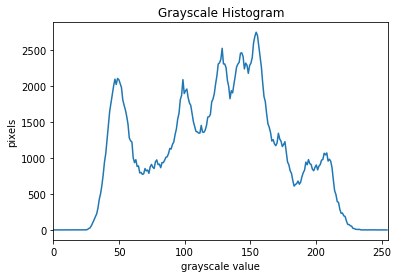

Enter the thresholds: 73 109 136 160 188

 2217.7581079036318


In [7]:
main()